### --------------------------------------------------------------------------------------------------------------------------------------------------------------


<h1><center><font size=9>IRIS Species Classification</center></font></h1>

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

![Machine Learning](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)





<br/>
<font color = "brown" size = 5>Problem Statment</font>

* The goal is to train a machine learning model capable of learning from these measurements and proficiently categorizing Iris flowers into their corresponding species.








<br/>
<font color = "brown" size = 5> Data Discription </font>


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


*   --> The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic
                 
*   --> Problems, and can also be found on the UCI Machine Learning Repository.

*   --> It includes three iris species with 50 samples each as well as some properties about each flower. 
                 
*   --> One flower species is linearly separable from the other two, but the other two are not linearly separable from each             other.

*   --> The columns in this dataset are:

                 1) Id
                 2) SepalLength
                 3) SepalWidth
                 4) PetalLength
                 5) PetalWidth
                 6) Species

 #### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br/>
<font color = "brown" size = 5> Approach to Prediction </font>
 
 #### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 
 *              1)Import all library
 
 *              2)Load Dataset
 
 *              3)Data preparation-a)Dealing with missing values
                                  b)Label Encoding
                                  c)Dealing with outliers
 *              4)Data visualization
 *              5)Regression
 *              6)Classification

 


<font color = "brown" size = 5>Importing Libraries</font>

In [3]:
## importing libraries as we needed.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings("ignore")


In [4]:
# Reading the Loan data file
df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\iris\\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<br/>
<font color = "brown" size = 5>Data Preprocessing</font>


In [91]:
#shape shows number of rows and columns
df.shape

(150, 5)

In [92]:
#Number of all records
df.size

750

In [93]:
## columns shows all columns in dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [94]:
#head() shows first 5 records
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
##tail() shows last 5 records
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [96]:
# info() function gives datatypes of dataframe variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [97]:
# isnull() functions is used to finds null values.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<font color = "black" size = 4>Observation:</font>
 We can see that there are no null values in this data set

In [98]:

df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [99]:
#isnull.sum() shows 
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [100]:
##describe() shows statistical view of dataset
df.describe(include='all')


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<br/>
<font color = "brown" size = 5>Data Visualization</font>


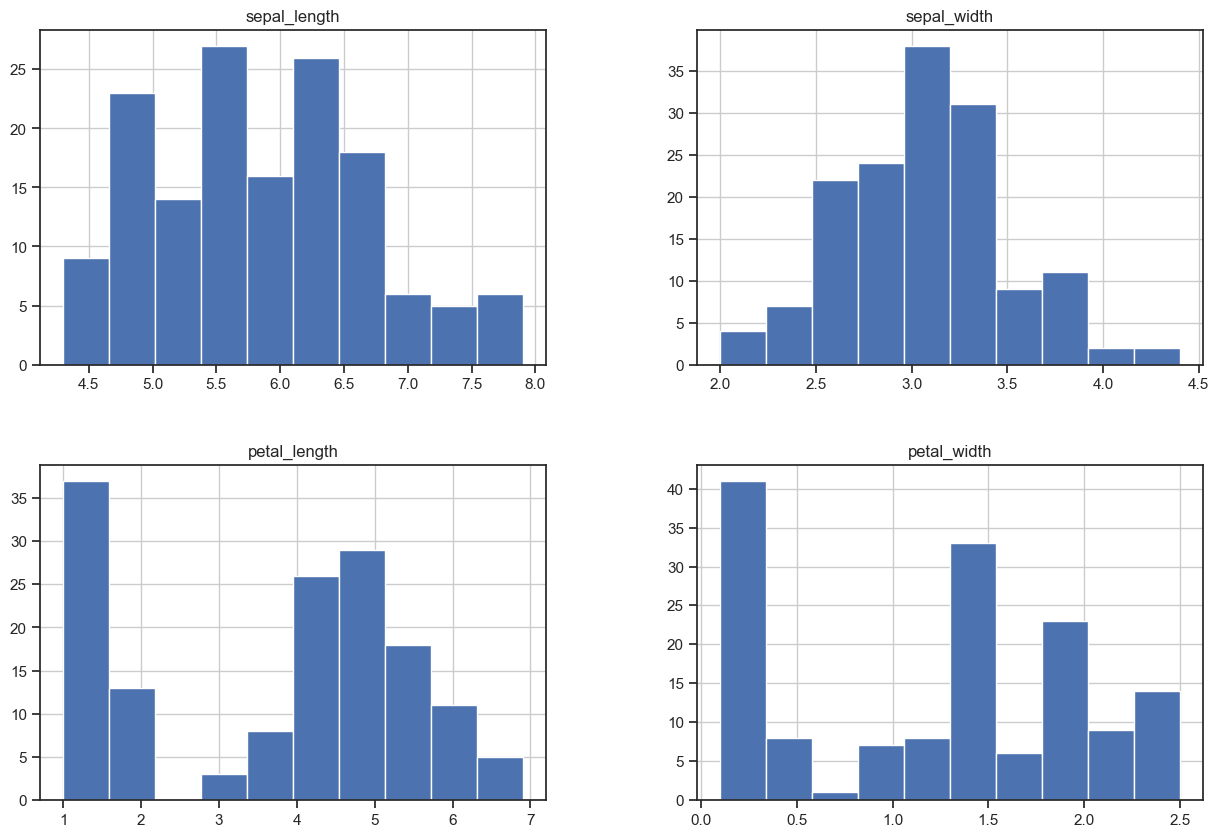

In [101]:
# visualizing numeric columns
df.hist(figsize = (15,10));

<br/>
<font color = "brown" size = 5>Checking For Outliers</font>


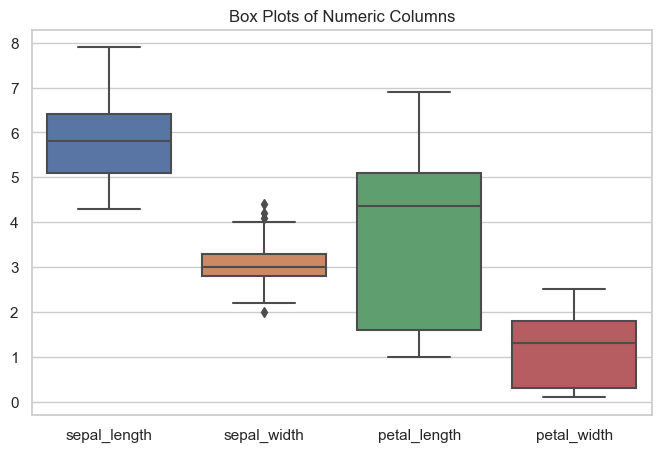

In [17]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Create box plots for each numeric column
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots of Numeric Columns')
plt.show()

<font size = 3> Observations </font>
*   From above we can see that sepal_width column has outlier .
*   The sepal_width column has large upper outliers and smaller amount lower outliers

<br/>
<font color = "brown" size = 5>Types of Species</font>

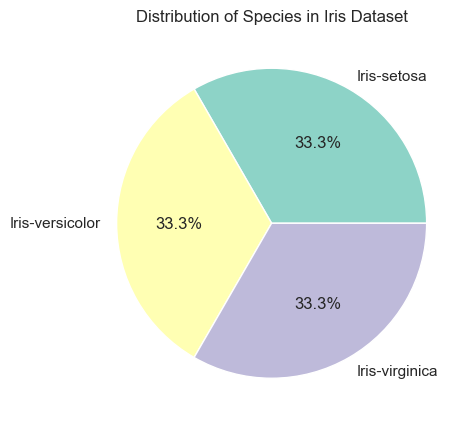

In [12]:
# Count the occurrences of each species
species_counts = df['species'].value_counts()

# Define custom colors
custom_colors = sns.color_palette('pastel')[0:3]

# Create a pie plot
plt.figure(figsize=(5, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Species in Iris Dataset')
plt.show()

* Observation: All Species are equally distributes.

<Axes: xlabel='species', ylabel='sepal_length'>

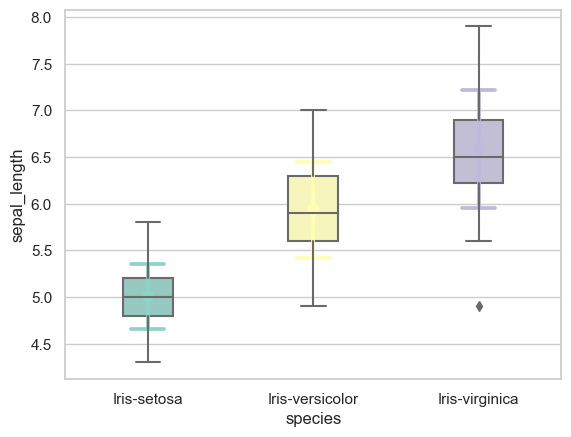

In [104]:
# Combined Plot: Pointplot and Boxplot of Sepal Length by Species
sns.pointplot(x='species', y='sepal_length', data=df, ci='sd', capsize=0.2, palette='Set3', join=False)
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set3', width=0.3)

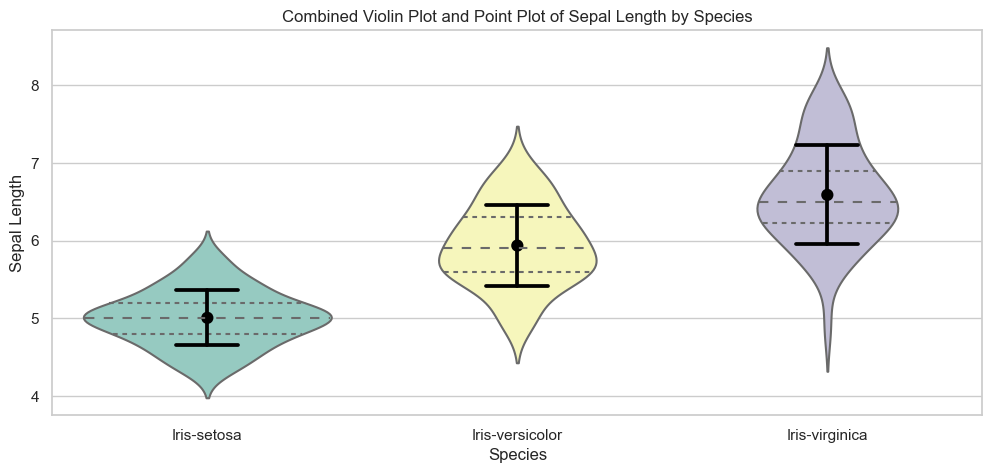

In [105]:
# Create a single plot with specific figure size
plt.figure(figsize=(12, 5))

# Combined Plot: Violin plot and Point plot of Sepal Length by Species
sns.violinplot(x='species', y='sepal_length', data=df, palette='Set3', inner='quartile')
sns.pointplot(x='species', y='sepal_length', data=df, ci='sd', capsize=0.2, color='black', join=False)

# Adjust layout for better spacing
plt.title('Combined Violin Plot and Point Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

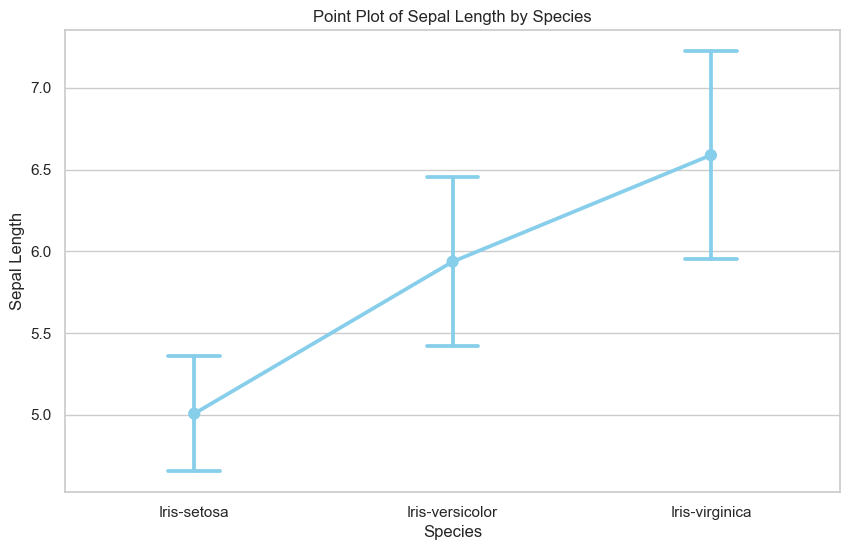

In [106]:
# Create a point plot for Sepal Length by Species
plt.figure(figsize=(10, 6))
sns.pointplot(x='species', y='sepal_length', data=df, ci='sd', capsize=0.2, color='skyblue')

# Adjust layout for better spacing
plt.title('Point Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

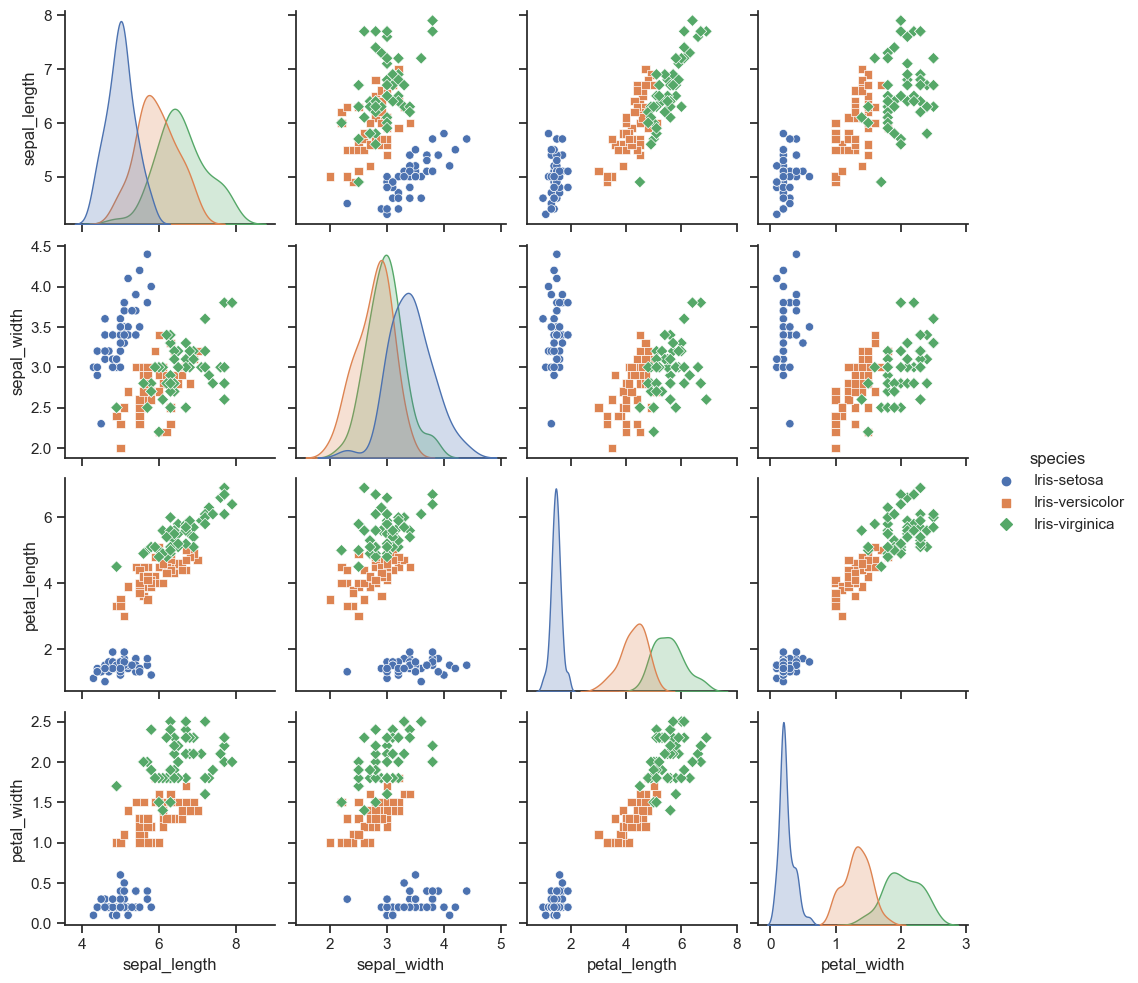

In [107]:
sns.set(style="ticks")
sns.pairplot(df, hue="species", markers=["o", "s", "D"])

<font color = "black" size = 4>Observation:</font>

* From this visualization, we can tell that iris-setosa is well separated from the other two flowers.

* And iris virginica is the longest flower and iris setosa is the shortest.

In [8]:
corelation_matrix = df.corr()

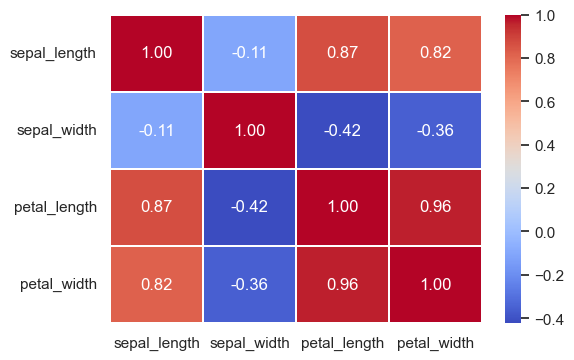

In [19]:
plt.figure(figsize = (6,4))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1);



<font color = "black" size = 4>Observation:</font>

* petal_length,petal_width,species are highly correlated each other


<br/>
<font color = "brown" size = 5>Model Building </font>

In [110]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']


In [112]:
X 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [114]:
for col in cat_col_list:
    print(f"{col}-->{list(df[col].unique())}")
    print("-"*30)

species-->['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
------------------------------


In [115]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [116]:
cat_col_list = [col for col in df.columns if df[col].dtypes == 'object']
cat_col_list 

['species']

In [117]:
for col in cat_col_list:
    print(f"{col}-->{list(df[col].unique())}")
    print("-"*30)

species-->['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
------------------------------


* Categorical value cannot be read so we have to convert them in the numeric form so the algorithm can process the data properly

In [118]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

## Random Sampling

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
print("x_train -->",X_train.shape)
print("y_train -->",y_train.shape)
print("-"*127)
print("x_test -->",X_test.shape)
print("y_test -->",y_test.shape)

x_train --> (120, 4)
y_train --> (120,)
-------------------------------------------------------------------------------------------------------------------------------
x_test --> (30, 4)
y_test --> (30,)


In [121]:
# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report


## Logistic Regression 

In [123]:


# Train and evaluate Logistic Regression
lr_classifier = LogisticRegression()
lr_accuracy, lr_report = train_and_evaluate_classifier(lr_classifier, X_train, y_train, X_test, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", lr_report)

Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Decision Tree Classifier

In [66]:
# Train and evaluate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_report = train_and_evaluate_classifier(dt_classifier, X_train, y_train, X_test, y_test)
print("\nDecision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier Classification Report:\n", dt_report)


Decision Tree Classifier Accuracy: 1.0
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



## Random Forest Classifier

In [67]:
# Train and evaluate Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_report = train_and_evaluate_classifier(rf_classifier, X_train, y_train, X_test, y_test)
print("\nRandom Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Classification Report:\n", rf_report)


Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



## Gradient Boosting Classifier

In [125]:
# Train and evaluate Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_accuracy, gb_report = train_and_evaluate_classifier(gb_classifier, X_train, y_train, X_test, y_test)
print("\nGradient Boosting Classifier Accuracy:", gb_accuracy)
print("Gradient Boosting Classifier Classification Report:\n", gb_report)


Gradient Boosting Classifier Accuracy: 1.0
Gradient Boosting Classifier Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## AdaBoost Classifier

In [124]:
# Train and evaluate AdaBoost Classifier
ab_classifier = AdaBoostClassifier()
ab_accuracy, ab_report = train_and_evaluate_classifier(ab_classifier, X_train, y_train, X_test, y_test)
print("\nAdaBoost Classifier Accuracy:", ab_accuracy)
print("AdaBoost Classifier Classification Report:\n", ab_report)



AdaBoost Classifier Accuracy: 1.0
AdaBoost Classifier Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## k-Nearest Neighbors (KNN)

In [70]:
# Train and evaluate k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_accuracy, knn_report = train_and_evaluate_classifier(knn_classifier, X_train, y_train, X_test, y_test)
print("\nk-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("k-Nearest Neighbors (KNN) Classification Report:\n", knn_report)


k-Nearest Neighbors (KNN) Accuracy: 1.0
k-Nearest Neighbors (KNN) Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



<br/>
<font color = "brown" size = 5>Conclusion</font>

#### Since there are less data given.The model is overfits.The Decision Tree,Random Forest,Gradient Boosting all gives high accuracy
          